# Spacenet - correct satellite imagery

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import geojson
import time
import sys
import imageio
import pickle
import json
from osgeo import gdal
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tqdm import tqdm
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from matplotlib.patches import Polygon
from PIL import Image, ImageOps 

### Find All Satellite Imagery

In [17]:
imfiles = []
basedir = '../../data/spacenet/khartoum/train/processed/satellite/'
for root, dirs, files in os.walk(basedir, topdown=False):
    for name in files:
        if '.png' in name:
            imfiles.append(os.path.join(root, name))

### Loop Through Images to Correct

In [18]:
# resolution = 650
# width = 0.000001
# count = 0
# geobase_dir = '../../data/spacenet/khartoum/train/raw/geojson/buildings/buildings_AOI_5_Khartoum_'
# satpng_dir = '../../data/spacenet/khartoum/train/processed/satellite/'
# plt.figure(figsize=(12,12))    
# fig,ax = plt.subplots()
imfiles = [imfiles[10]]
for i in tqdm(range(len(imfiles))):
    satfile = imfiles[i]
    new_satfile = satfile.replace('processed','equalized')
    im = Image.open(satfile)
    im2 = ImageOps.equalize(im, mask = None)
#     geofile = geobase_dir + satfile.split('_')[-1].replace('.tif','.geojson')
#     new_satfile = satpng_dir + str(count).zfill(3) + '.png'
#     satpng_file = satpng_dir + str(count).zfill(3) + '.png'
#     segpng_file = satpng_file.replace('satellite','segmented')
#     count = count + 2
#     raster = gdal.Open(satfile, gdal.GA_ReadOnly)

#     band1 = raster.GetRasterBand(1).ReadAsArray()
#     band2 = raster.GetRasterBand(2).ReadAsArray()
#     band3 = raster.GetRasterBand(3).ReadAsArray()
#     im = np.zeros((band1.shape[0],band1.shape[1],3))
#     im[:,:,0] = band1
#     im[:,:,1] = band2
#     im[:,:,2] = band3
#     im = im / 2000 * 255
#     image = Image.fromarray(im.astype('uint8'))
#     image.save(satpng_file)

#     geotransform = raster.GetGeoTransform()
#     (xs,xw,zs,ys,ze,yw) = geotransform
#     xpos = np.linspace(xs,xs+(resolution*xw))
#     ypos = np.linspace(ys,ys+(resolution*yw))
#     with open(geofile) as f:

#         #Add Patches 
#         gj = geojson.load(f)
#         for item in gj['features']:
#             coordinates = item['geometry']['coordinates']
#             coordinates = np.squeeze(np.array(coordinates))
#             if (len(coordinates.shape) == 2):
#                 px = coordinates[:,0]
#                 py = coordinates[:,1]
#                 p = Polygon(coordinates[:,:2], edgecolor='r',facecolor='r')
#                 plt.plot(coordinates[:,0],coordinates[:,1],c='r',linewidth=0.1)
#                 ax.add_patch(p)

#     #Add Corners
#     p1,p2,p3,p4 = addCorners(xs,xw,ys,yw,resolution,width,'k')
#     ax.add_patch(p1)
#     ax.add_patch(p2)
#     ax.add_patch(p3)
#     ax.add_patch(p4)
#     plt.box()
#     plt.grid('off')
#     plt.xticks([])
#     plt.yticks([])
#     plt.savefig(segpng_file, dpi=300,bbox_inches="tight")    
#     plt.clf()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.68it/s]


In [19]:
print(np.min(im))
print(np.max(im))

0
201


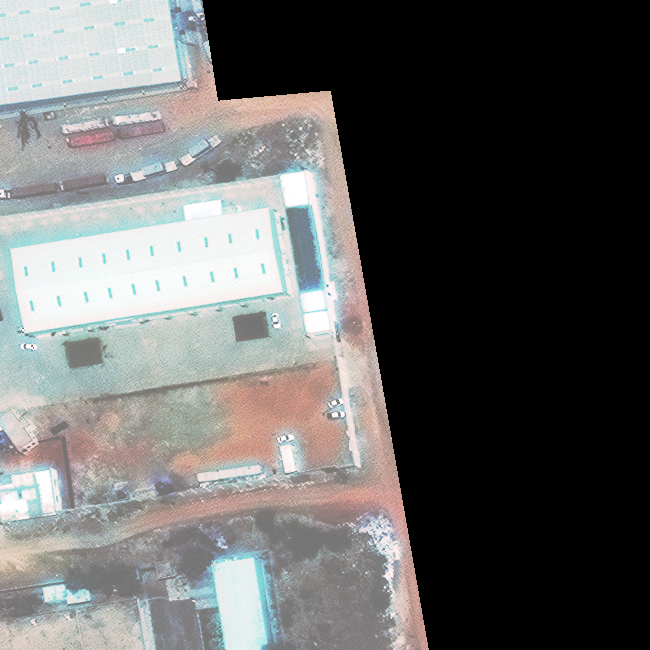

In [20]:
im2